In [3]:
!pip install librosa

  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.13.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [librosa]


In [4]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# data_dir="/home/ec2-user/SageMaker/projects/experimental/bio-ae-eval/research/template_crop_v1/data/audio/clips/tp/"
data_dir="/home/ec2-user/SageMaker/projects/experimental/bio-ae-eval/research/template_crop_v4/data/audio/clips/tp/"
# data_dir="/home/ec2-user/SageMaker/projects/experimental/bio-ae-eval/data/audio/clips/tp/"

classes = os.listdir(data_dir)


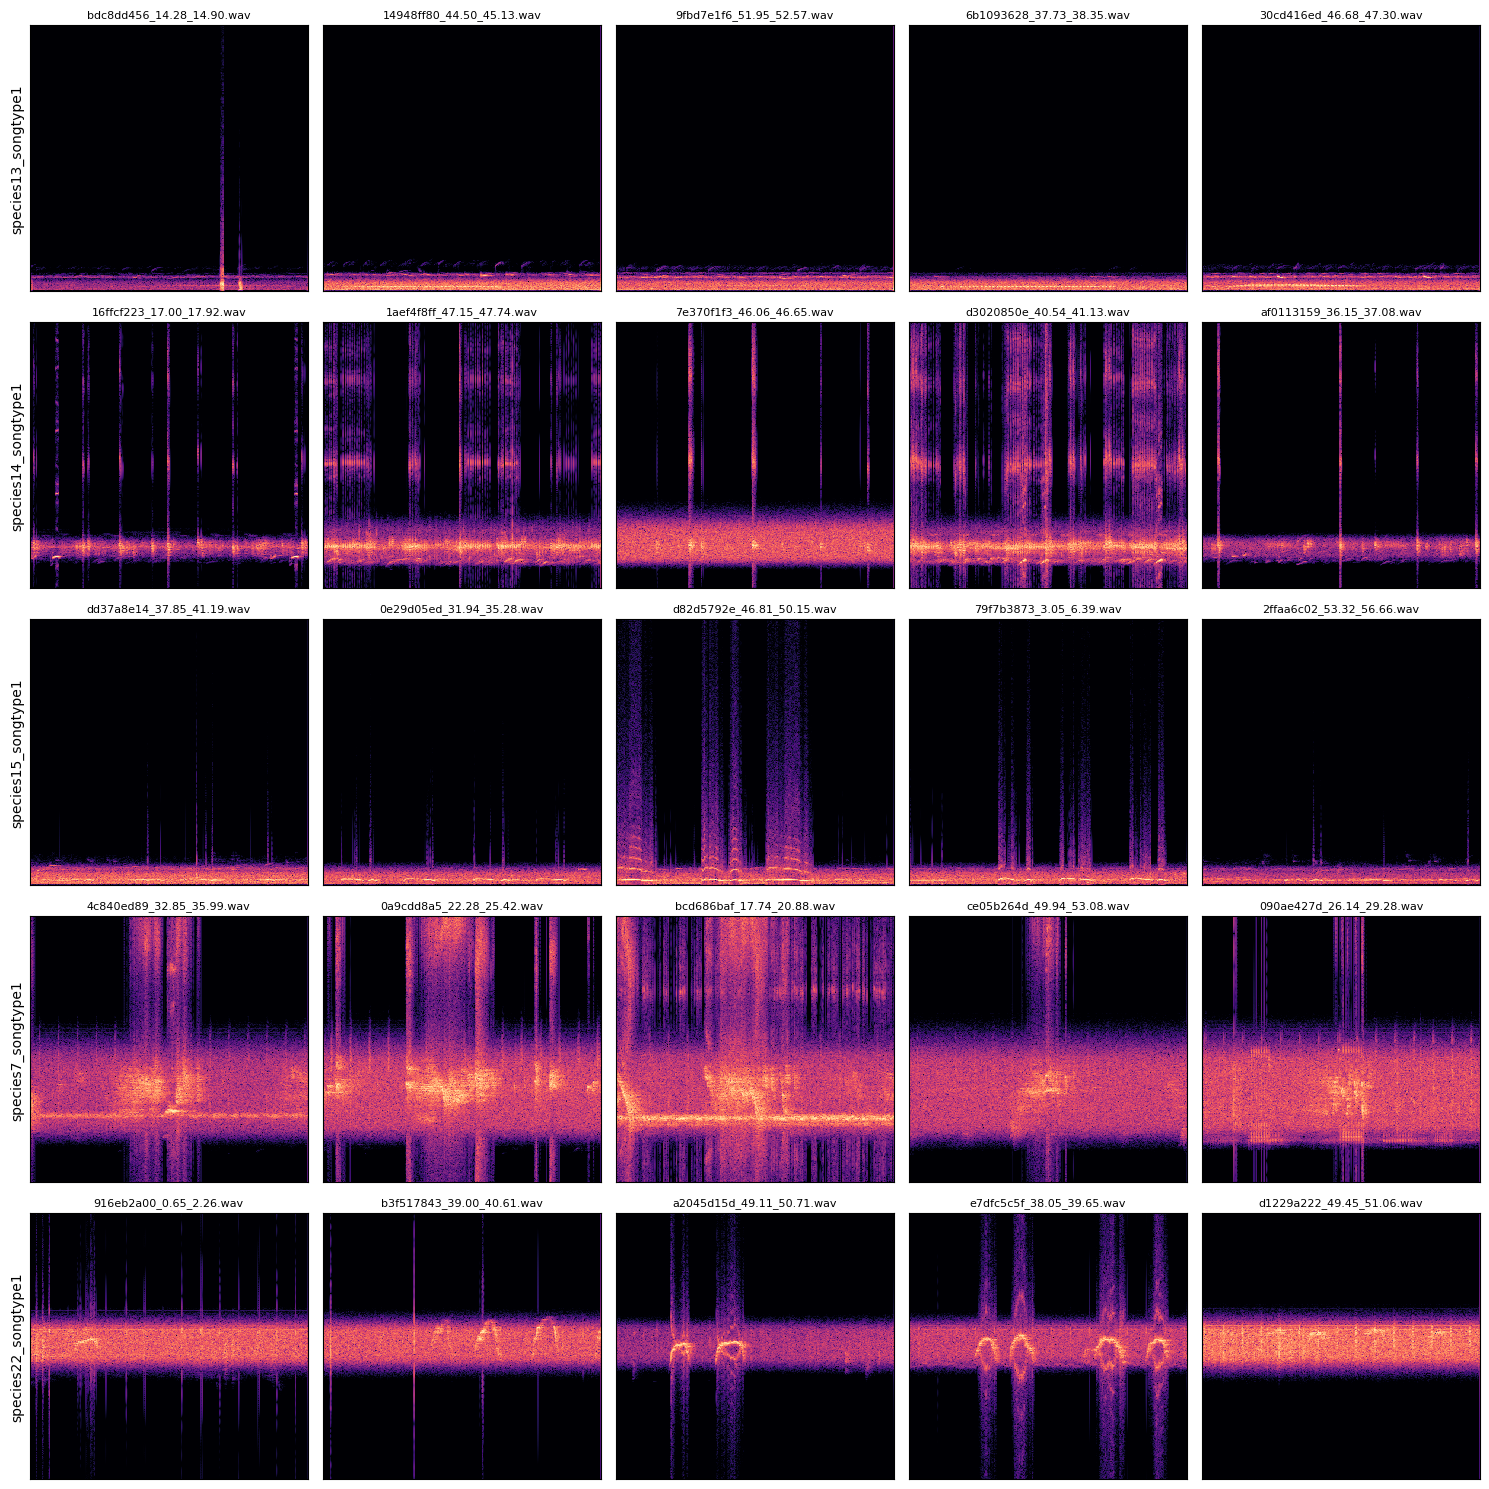

In [6]:
n_classes = 5 # how many sample classes
n_examples = 5 # how many per class

# choose classes (folder names)
sample_classes = random.sample(classes, n_classes)

fig, axes = plt.subplots(len(sample_classes), n_examples, figsize=(3*n_examples, 3*len(sample_classes)))

for i, cls in enumerate(sample_classes):
    class_dir = os.path.join(data_dir, cls)
    files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".wav")]
    chosen = random.sample(files, min(len(files), n_examples))

    for j, f in enumerate(chosen):
        ax = axes[i, j] if len(sample_classes) > 1 else axes[j]
        y, sr = librosa.load(f, sr=None)
        S = librosa.stft(y)
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_db, sr=sr, x_axis="time", ax=ax)
        ax.set_title(os.path.basename(f), fontsize=8)
        if j == 0:
            ax.set_ylabel(cls)  # label the row with the class name
        else:
            ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
# plt.savefig('./example_bandpass_spectrograms.png')
plt.show()
